In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')

import mikeio

In [ ]:
track_file = '../tests/testdata/altimetry_NorthSea_20171027.csv'
data_file = '../tests/testdata/NorthSea_HD_and_windspeed.dfsu'

In [ ]:
dfs = mikeio.open(data_file)
dfs

<mikeio.Dfsu2DH>
number of elements: 958
number of nodes: 570
projection: LONG/LAT
items:
 0: Surface elevation <Surface Elevation> (meter)
 1: Wind speed <Wind speed> (meter per sec)
time: 2017-10-27 00:00:00 - 2017-10-29 18:00:00 (67 records)

In [ ]:
track = pd.read_csv(track_file, index_col=0, parse_dates=True)

In [ ]:
track.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lon</th>
      <th>lat</th>
      <th>surface_elevation</th>
      <th>significant_wave_height</th>
      <th>wind_speed</th>
    </tr>
    <tr>
      <th>date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2017-10-26 04:37:37</th>
      <td>8.757272</td>
      <td>53.926136</td>
      <td>1.6449</td>
      <td>0.426</td>
      <td>6.100000</td>
    </tr>
    <tr>
      <th>2017-10-26 04:37:54</th>
      <td>8.221631</td>
      <td>54.948459</td>
      <td>1.1200</td>
      <td>1.634</td>
      <td>9.030000</td>
    </tr>
    <tr>
      <th>2017-10-26 04:37:55</th>
      <td>8.189390</td>
      <td>55.008547</td>
      <td>1.0882</td>
      <td>1.717</td>
      <td>9.370000</td>
    </tr>
    <tr>
      <th>2017-10-26 04:37:56</th>
      <td>8.157065</td>
      <td>55.068627</td>
      <td>1.0309</td>
      <td>1.869</td>
      <td>9.559999</td>
    </tr>
    <tr>
      <th>2017-10-26 04:37:58</th>
      <td>8.124656</td>
      <td>55.128700</td>
      <td>1.0369</td>
      <td>1.939</td>
      <td>9.980000</td>
    </tr>
  </tbody>
</table>
</div>

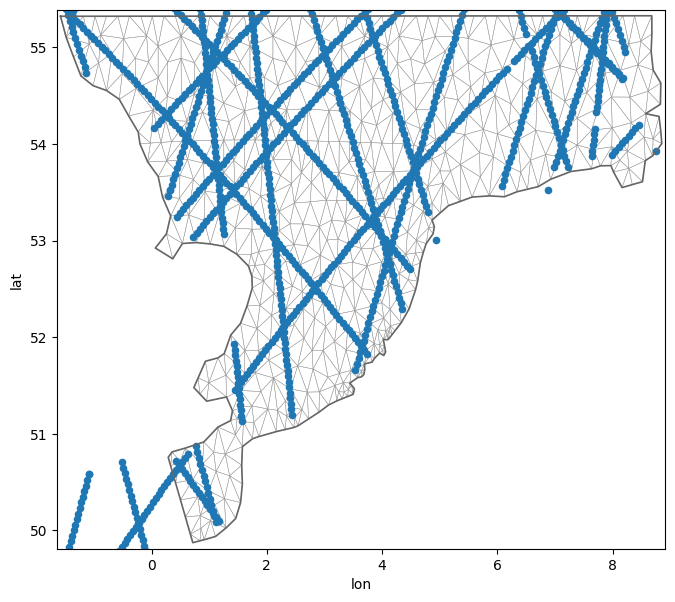

In [ ]:
ax = dfs.geometry.plot.mesh(figsize=(8,7), title="")
track.plot.scatter('lon','lat', ax=ax)

In [ ]:
track_xy = track[['lon','lat']].values
f'Inside domain: {sum(dfs.geometry.contains(track_xy))} points of the track (total: {len(track_xy)})'

'Inside domain: 922 points of the track (total: 1115)'

In [ ]:
e_track = dfs.extract_track(track_file)

In [ ]:
e_track

<mikeio.Dataset>
dims: (time:1115)
time: 2017-10-26 04:37:37 - 2017-10-30 20:54:47 (1115 non-equidistant records)
geometry: GeometryUndefined()
items:
 0: Longitude <Latitude longitude> (degree)
 1: Latitude <Latitude longitude> (degree)
 2: Surface elevation <Surface Elevation> (meter)
 3: Wind speed <Wind speed> (meter per sec)

In [ ]:
import marimo as mo

# Dfsu - Extract Track
Similar to the MIKE tool DataTrackExtractionFM.exe the Dfsu method extract_track() can be used to extract model data along a track (e.g. satellite altimetry track)

## Load dfsu result file
The file contains surface elevation and wind speed model data. We wish to compare the model data with altimetry data

## Load and visualize altimetry tracks
The altimetry data is stored in a csv file. We plot the data on top of the dfsu mesh.

## Extract track data from dfsu file
The extract_track() takes a track definition (time, longitude, latitude of each point) as either a dataframe, a csv-file, a dfs0 file or a mikeio.Dataset.